
Generating visualizations...



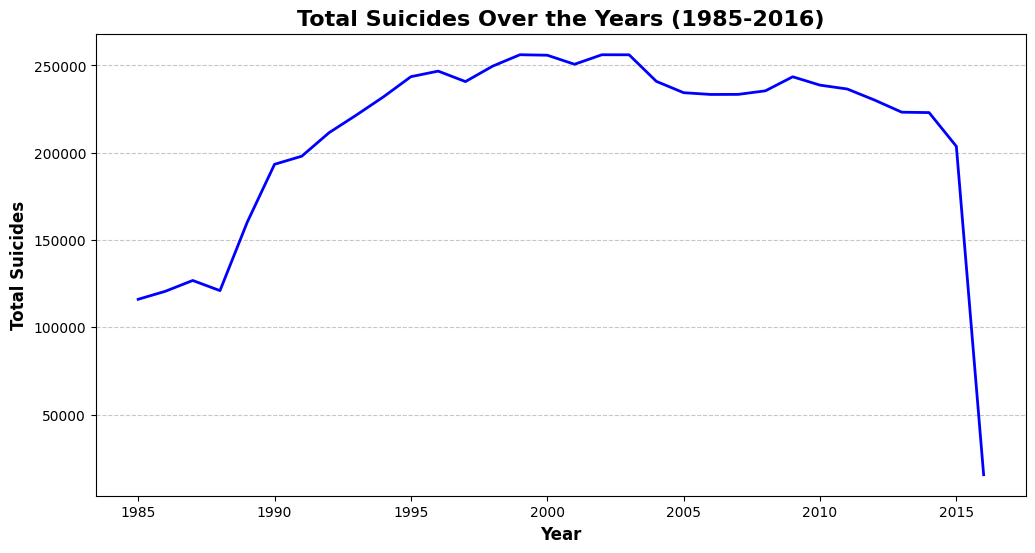

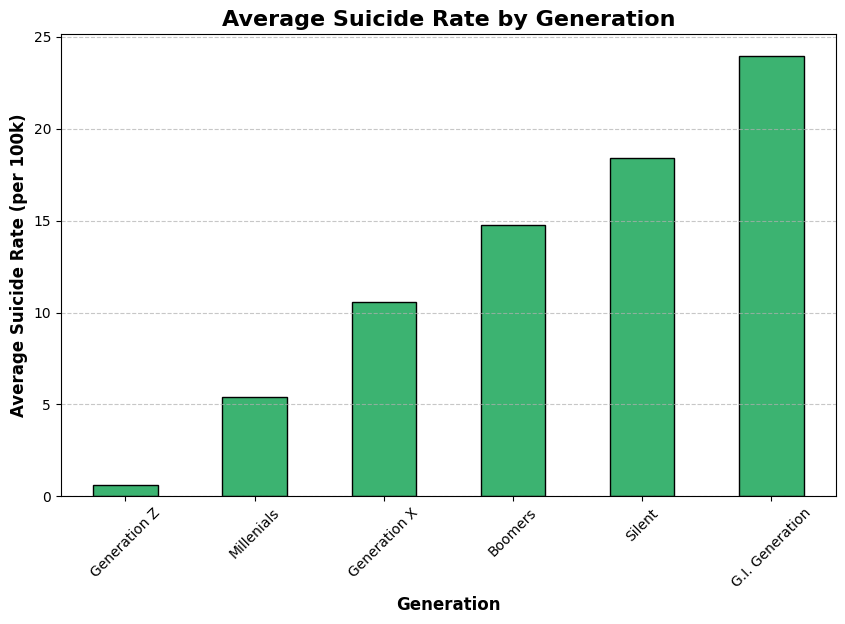

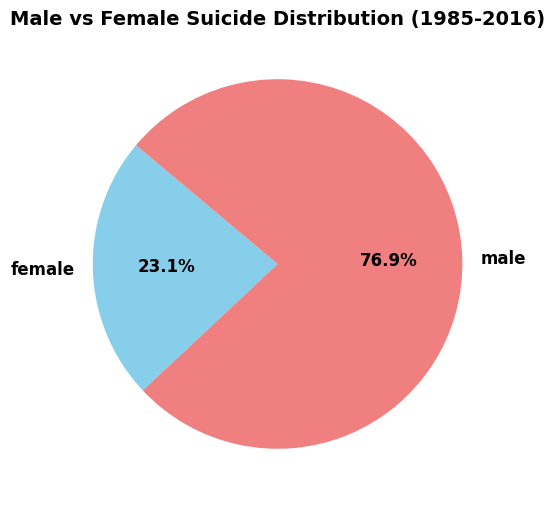

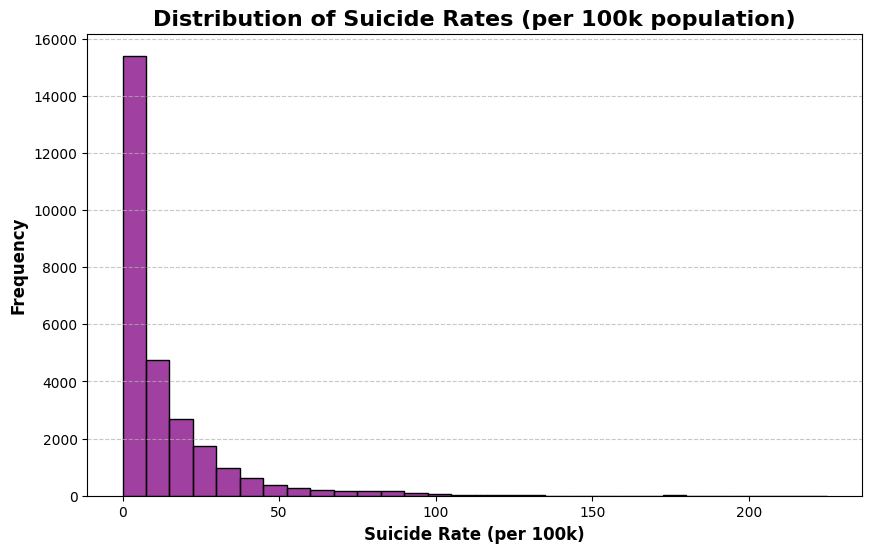

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def load_and_clean_data(file_path):
    """
    Load and clean the dataset.
    """
    # Load the dataset
    df = pd.read_csv(file_path)

    # Strip column names of extra spaces
    df.columns = df.columns.str.strip()

    # Fill missing values with 0 for simplicity
    df.fillna(0, inplace=True)

    # Ensure proper data types
    df['year'] = df['year'].astype(int)
    df['population'] = df['population'].astype(int)
    df['suicides_no'] = df['suicides_no'].astype(int)

    return df


def line_plot_suicides_over_years(df):
    """
    Create a line plot for total suicides over the years.
    """
    yearly_suicides = df.groupby('year')['suicides_no'].sum()

    plt.figure(figsize=(12, 6))
    plt.plot(yearly_suicides, color='blue', linewidth=2)
    plt.title('Total Suicides Over the Years (1985-2016)', fontsize=16, fontweight='bold')
    plt.xlabel('Year', fontsize=12, fontweight='bold')
    plt.ylabel('Total Suicides', fontsize=12, fontweight='bold')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()


def bar_chart_suicides_by_generation(df):
    """
    Create a bar chart showing average suicide rate by generation.
    """
    generation_data = df.groupby('generation')['suicides/100k pop'].mean().sort_values()

    plt.figure(figsize=(10, 6))
    generation_data.plot(kind='bar', color='mediumseagreen', edgecolor='black')
    plt.title('Average Suicide Rate by Generation', fontsize=16, fontweight='bold')
    plt.xlabel('Generation', fontsize=12, fontweight='bold')
    plt.ylabel('Average Suicide Rate (per 100k)', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


def pie_chart_sex_distribution(df):
    """
    Create a pie chart for male vs female suicide distribution.
    """
    sex_data = df.groupby('sex')['suicides_no'].sum()

    plt.figure(figsize=(8, 6))
    plt.pie(
        sex_data,
        labels=sex_data.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=['skyblue', 'lightcoral'],
        textprops={'fontsize': 12, 'fontweight': 'bold'}
    )
    plt.title('Male vs Female Suicide Distribution (1985-2016)', fontsize=14, fontweight='bold')
    plt.show()


def histogram_suicide_rate(df):
    """
    Create a histogram of suicide rates per 100k population.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(df['suicides/100k pop'], bins=30, kde=False, color='purple', edgecolor='black')
    plt.title('Distribution of Suicide Rates (per 100k population)', fontsize=16, fontweight='bold')
    plt.xlabel('Suicide Rate (per 100k)', fontsize=12, fontweight='bold')
    plt.ylabel('Frequency', fontsize=12, fontweight='bold')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()


def main():
    # Step 1: Load and clean data
    file_path = "Suicide Rates Overview 1985 to 2016.csv"
    df = load_and_clean_data(file_path)

    # Step 2: Generate visualizations
    print("\nGenerating visualizations...\n")

    # Line Plot
    line_plot_suicides_over_years(df)

    # Bar Chart
    bar_chart_suicides_by_generation(df)

    # Pie Chart
    pie_chart_sex_distribution(df)

    # Histogram
    histogram_suicide_rate(df)


if __name__ == "__main__":
    main()
